In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("/content/standard-spectra_848x.webp")
img = cv2.flip(img, 0)  # Flip image vertically (0 for vertical flip)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define appropriate color range for data points (adjust based on your image)
lower_color = np.array([100, 140, 100])  # Adjust Hue, Saturation, Value for your data points
upper_color = np.array([140, 255, 255])

mask = cv2.inRange(img_hsv, lower_color, upper_color)
# Remove noise by applying erosion and dilation (adjust kernel size as needed)
kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

data_points = []
for cnt in contours:
    for point in cnt:
        x, y = point[0]
        data_points.append((x, y))

# Get user-defined axis ranges (physical units)
while True:
    try:
        x_min_physical = float(input("Enter minimum X value in physical units (e.g., 0): "))
        x_max_physical = float(input("Enter maximum X value in physical units (e.g., 100): "))
        y_min_physical = float(input("Enter minimum Y value in physical units (e.g., 400): "))
        y_max_physical = float(input("Enter maximum Y value in physical units (e.g., 1000): "))
        if x_min_physical >= x_max_physical or y_min_physical >= y_max_physical:
            print("Error: Minimum values must be less than maximum values.")
        else:
            break
    except ValueError:
        print("Invalid input. Please enter numbers only.")

x_scale = (x_max_physical - x_min_physical) / (max(x[0] for x in data_points) - min(x[0] for x in data_points))
y_scale = (y_max_physical - y_min_physical) / (max(y[1] for y in data_points) - min(y[1] for y in data_points))

data_points_physical = []
for x, y in data_points:
    x_physical = x_min_physical + (x - min(x[0] for x in data_points)) * x_scale
    y_physical = y_min_physical + (y - min(y[1] for y in data_points)) * y_scale
    data_points_physical.append((x_physical, y_physical))

# Create DataFrame and display plot
data_df = pd.DataFrame(data_points_physical, columns=["X", "Y"])
# plt.imshow(img[::-1], origin='lower')
# plt.scatter([x for x, _ in data_points_physical], [y for _, y in data_points_physical], color="red")
# plt.title("Data Points with Physical Units")
# plt.xlabel("X (physical units)")
# plt.ylabel("Y (physical units)")
# plt.xlim(x_min_physical, x_max_physical)
# plt.ylim(y_min_physical, y_max_physical)
# plt.show()

# Save extracted data to CSV (optional)
data_df.to_csv("extracted_data.csv", index=False)
data_df


Enter minimum X value in physical units (e.g., 0): 0
Enter maximum X value in physical units (e.g., 100): 4000
Enter minimum Y value in physical units (e.g., 400): 0
Enter maximum Y value in physical units (e.g., 1000): 2.0


,X,Y
0,791.208791,1.73
1,791.208791,1.82
2,769.230769,1.83
3,769.230769,1.89
4,747.252747,1.90
...,...,...
173,43.956044,0.01
174,3956.043956,0.00
175,3956.043956,0.02
176,4000.000000,0.02


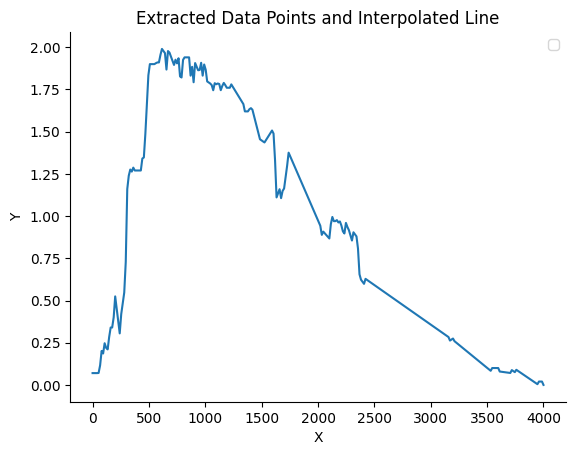

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  # Import for interpolation

# Sort the data points by x-values for interpolation
data_df = data_df.sort_values(by='X')

x = data_df['X'].tolist()
y = data_df['Y'].tolist()

f = interp1d(x, y, kind='linear')

# Generate new xY-values for a smoother line
new_x = np.linspace(min(x), max(x), 300)
new_y = f(new_x)
plt.plot(new_x, new_y)
# Optional: Plot the original data points (scatter plot)
# plt.scatter(x, y, s=32, alpha=0.8, label='Data Points')

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Extracted Data Points and Interpolated Line')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
# plt.grid(True)

plt.show()


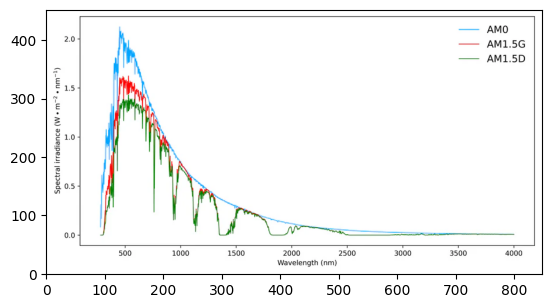

In [ ]:
plt.imshow(img, origin='lower')

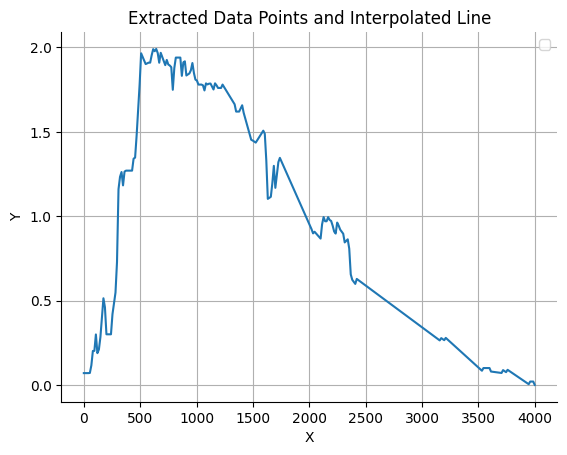

In [ ]:
# Plot the interpolated line
plt.plot(new_x, new_y)

# Customize the plot with specific tick counts and ranges
plt.xticks(np.linspace(min(x), max(x), 9))  # 8 divisions (9 tick values) for x-axis
plt.yticks(np.linspace(0, 2.0, 5))  # 4 divisions (5 tick values) for y-axis
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Extracted Data Points and Interpolated Line')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)  # Add grid lines for better visualization

plt.show()